# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [9]:
import pandas as pd

csv_file_path = 'country_vaccinations.csv'
data = pd.read_csv('/content/country_vaccinations.csv')

# Display the first few rows of the dataset to understand its structure
print("Preview of the dataset:")
print(data.head())

# Get the number of rows and columns in the dataset
num_rows, num_columns = data.shape

# Print the results
print(f"\nThe dataset has {num_rows} rows and {num_columns} columns.")

Preview of the dataset:
       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundr

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [10]:
# Find the number of unique values for each column
unique_counts = data.nunique()

# Identify the column with the most unique values
most_diverse_column = unique_counts.idxmax()
most_diverse_count = unique_counts.max()

# Exclude unique identifiers (e.g., 'iso_code', 'country') and find the next most diverse column
columns_to_exclude = ['iso_code', 'country']
diverse_without_id = unique_counts.drop(columns_to_exclude, errors='ignore')
next_most_diverse_column = diverse_without_id.idxmax()
next_most_diverse_count = diverse_without_id.max()

# Step 6: Print the results
print("Unique Values per Column:")
print(unique_counts)
print("\nMost Diverse Column:")
print(f"Column: {most_diverse_column}, Unique Values: {most_diverse_count}")
print("\nNext Most Diverse Column (Excluding Identifiers):")
print(f"Column: {next_most_diverse_column}, Unique Values: {next_most_diverse_count}")

Unique Values per Column:
country                                  217
iso_code                                 217
date                                     201
total_vaccinations                     14100
people_vaccinated                      13240
people_fully_vaccinated                10399
daily_vaccinations_raw                 10485
daily_vaccinations                     14902
total_vaccinations_per_hundred          5699
people_vaccinated_per_hundred           4619
people_fully_vaccinated_per_hundred     3086
daily_vaccinations_per_million          8348
vaccines                                  56
source_name                               95
source_website                           150
dtype: int64

Most Diverse Column:
Column: daily_vaccinations, Unique Values: 14902

Next Most Diverse Column (Excluding Identifiers):
Column: daily_vaccinations, Unique Values: 14902


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [11]:
# Display a preview of the dataset
print("Preview of the dataset:")
print(data.head())
print("\n")

# Identify redundant columns
redundant_columns = [col for col in data.columns if data[col].nunique() == 1]

# Output the results
if redundant_columns:
    print("The following columns have the same value for all rows (redundant):")
    print(redundant_columns)
else:
    print("No redundant columns found in the dataset.")

Preview of the dataset:
       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundr

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

Numeric columns in the dataset: Index(['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million'],
      dtype='object')


Text(0, 0.5, 'Frequency')

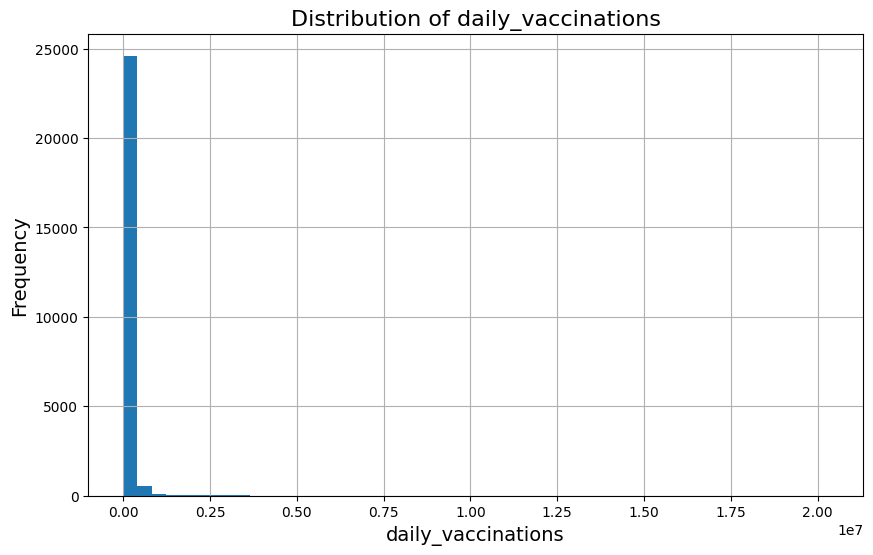

In [12]:
# Identify numeric columns in the dataset
numeric_columns = data.select_dtypes(include=['number']).columns
print("Numeric columns in the dataset:", numeric_columns)

# Choose a numeric column for visualization
column_to_plot = 'daily_vaccinations'  # Replace with another column if needed

# Drop NaN values from the selected column
numeric_data = data[column_to_plot].dropna()

# Create the histogram using pandas' built-in functionality
histogram = numeric_data.hist(bins=50, figsize=(10, 6), grid=True)
histogram.set_title(f"Distribution of {column_to_plot}", fontsize=16)
histogram.set_xlabel(column_to_plot, fontsize=14)
histogram.set_ylabel("Frequency", fontsize=14)

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

Top 5 countries with the highest total vaccinations:
country
China             1.029223e+09
United States     3.179664e+08
India             2.742866e+08
Brazil            8.696057e+07
United Kingdom    7.457768e+07
Name: total_vaccinations, dtype: float64


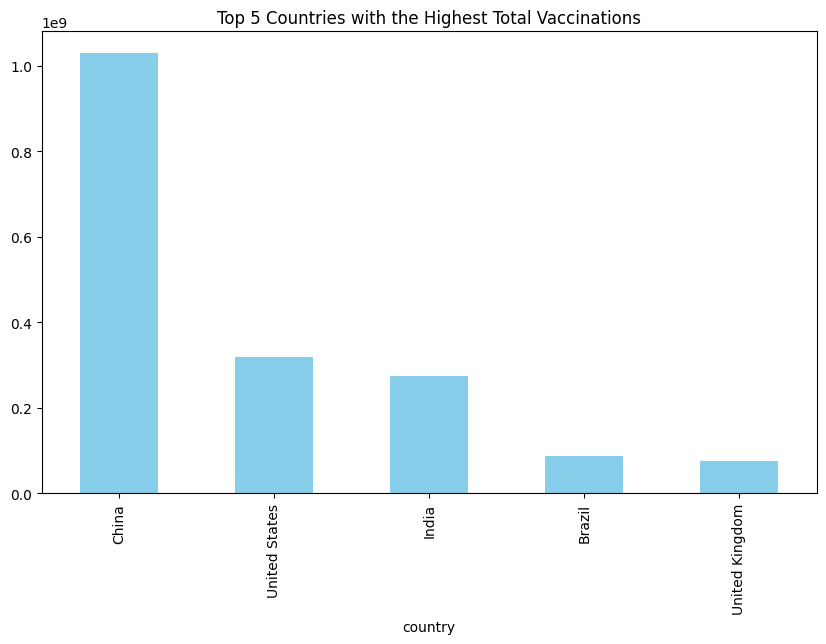

In [13]:
import pandas as pd

# Load the dataset
csv_file_path = 'country_vaccinations.csv'  # Path to the dataset
data = pd.read_csv('/content/country_vaccinations.csv')

# Analyze trends in vaccination data
# Example: Find the top 5 countries with the highest total vaccinations
top_countries = data.groupby('country')['total_vaccinations'].max().sort_values(ascending=False).head(5)

# Plot the top 5 countries with the highest total vaccinations using pandas
top_countries.plot(kind='bar', title='Top 5 Countries with the Highest Total Vaccinations',
                   color='skyblue', figsize=(10, 6), legend=False)

# Print observations
print("Top 5 countries with the highest total vaccinations:")
print(top_countries)



---



## Submitting Your Work

Submit your work as usual.